In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [119]:
weather_data_path = 'weather_data.xlsx'
bike_date_path = 'final_df_bike_hires.xlsx'

In [120]:
weather_df = pd.read_excel(weather_data_path)
bike_df = pd.read_excel(bike_date_path)

In [122]:
def get_analytics_df(dataframe):
    local_df = pd.merge(left=dataframe, right=bike_df, on=['year','month','day'], how='left')
    return local_df

In [123]:
#Feature	    Usual 	   Somewhat unusual	    Significantly Unusual
#Temperature	-1 to +1	±1 to ±2	        < -2 or > +2
def get_weather_interpretation(value, lower_threshold = 1, higher_threshold = 2):
    if value == 0:
        return 'The day is typical'
    elif abs(value) > lower_threshold and abs(value) < higher_threshold:
        return 'The day is unusual'
    elif abs(value) > higher_threshold:
        return 'The day is significantly unusual'
    elif value < 0:
        return 'Less temperature than usual'
    elif value > 0:
        return 'More temperature than usual'
    else:
        return 'Nan'

In [124]:
def get_interpretation(dataframe, z_score_column):
    dataframe['weather_z_interpretation'] = dataframe[z_score_column].apply(get_weather_interpretation)
    print(dataframe['weather_z_interpretation'].value_counts())
    print('------------------------------')
    print(dataframe['z_score_interpretation'].value_counts())

In [125]:
def create_scatter_plot(dataframe, column_x, column_y):
    plt.scatter(dataframe[column_x], dataframe[column_y])
    plt.xlabel(f"{column_x} Distribution")
    plt.ylabel(f"{column_y}")
    plt.title(f"{column_x} vs. {column_y}")
    plt.show()

In [126]:
def get_correlation(dataframe, column_a, column_b):
    correlation = dataframe[column_a].corr(dataframe[column_b])
    create_scatter_plot(dataframe,column_a, column_b)
    print(f'Pearson correlation coefficient:{correlation}')

In [133]:
def temperature_analysis():
    weather_temperature_df = weather_df[['year','month','day','temperature','temperature_mean','temperature_z_score']].copy()
    full_temperature_df = get_analytics_df(weather_temperature_df)
    get_interpretation(full_temperature_df,'temperature_z_score')
    get_correlation(full_temperature_df,'temperature','bicycle_hires')

def rain_analysis():
    weather_rain_df = weather_df[['year','month','day','rain_sum','rain_mean','rain_z_score']].copy()
    full_rain_df = get_analytics_df(weather_rain_df)
    get_interpretation(full_rain_df,'rain_z_score')
    get_correlation(full_rain_df,'rain_sum','bicycle_hires')

def rain_time_analysis():
    weather_rain_time_df = weather_df[['year','month','day','rain_hours','rain_hours_mean','rain_hours_z_score']].copy()
    full_rain_df = get_analytics_df(weather_rain_time_df)
    get_interpretation(full_rain_df,'rain_hours_z_score')
    get_correlation(full_rain_df,'rain_hours','bicycle_hires')

def wind_analysis():
    weather_wind_df = weather_df[['year','month','day','wind_speed','wind_speed_mean','wind_speed_z_score']].copy()
    full_rain_time_df = get_analytics_df(weather_wind_df)
    get_interpretation(full_rain_time_df,'wind_speed_z_score')
    get_correlation(full_rain_time_df,'wind_speed','bicycle_hires')

def radiation_analysis():
    weather_radiation_df = weather_df[['year','month','day','exposure_sum','exposure_mean','exposure_z_score']].copy()
    full_radiation_df = get_analytics_df(weather_radiation_df)
    get_interpretation(full_radiation_df,'exposure_z_score')
    get_correlation(full_radiation_df,'exposure_sum','bicycle_hires')

In [131]:
def main():
    temperature_analysis()
    rain_analysis()
    rain_time_analysis()
    wind_analysis()
    radiation_analysis()


weather_z_interpretation
More temperature than usual         679
Less temperature than usual         592
The day is unusual                  480
The day is significantly unusual     76
Name: count, dtype: int64
------------------------------
z_score_interpretation
More hires than usual               822
The day is unusual                  467
Fewer hires than usual              441
The day is significantly unusual     96
Name: count, dtype: int64


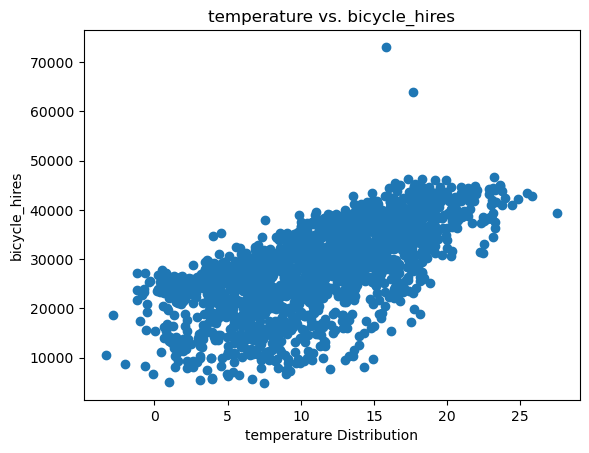

Pearson correlation coefficient:0.6768434977930364
weather_z_interpretation
Less temperature than usual         1325
More temperature than usual          251
The day is unusual                   133
The day is significantly unusual     118
Name: count, dtype: int64
------------------------------
z_score_interpretation
More hires than usual               822
The day is unusual                  467
Fewer hires than usual              441
The day is significantly unusual     96
Name: count, dtype: int64


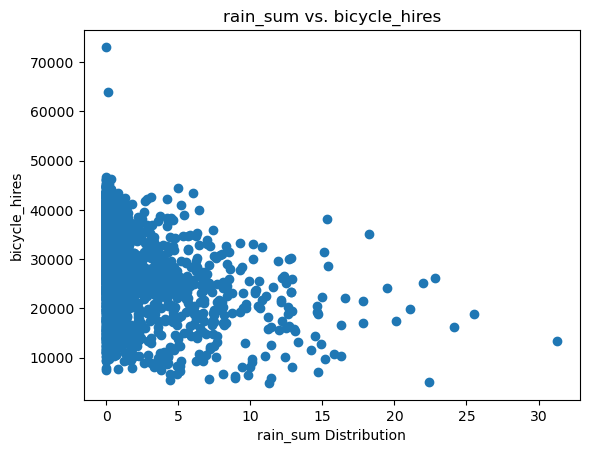

Pearson correlation coefficient:-0.3515643239164854
weather_z_interpretation
Less temperature than usual         1112
More temperature than usual          385
The day is unusual                   218
The day is significantly unusual     112
Name: count, dtype: int64
------------------------------
z_score_interpretation
More hires than usual               822
The day is unusual                  467
Fewer hires than usual              441
The day is significantly unusual     96
Name: count, dtype: int64


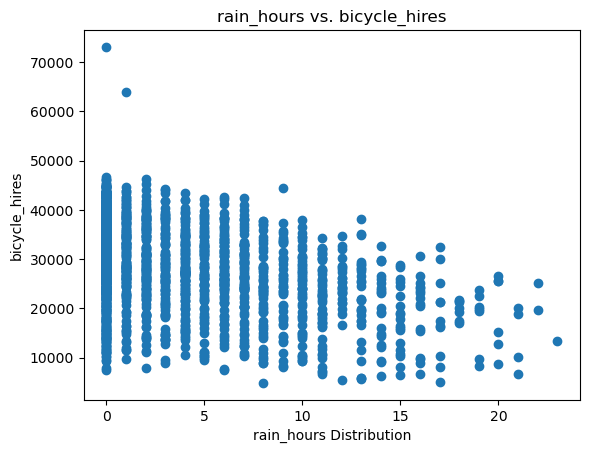

Pearson correlation coefficient:-0.4018974367780594
weather_z_interpretation
Less temperature than usual         671
More temperature than usual         554
The day is unusual                  525
The day is significantly unusual     77
Name: count, dtype: int64
------------------------------
z_score_interpretation
More hires than usual               822
The day is unusual                  467
Fewer hires than usual              441
The day is significantly unusual     96
Name: count, dtype: int64


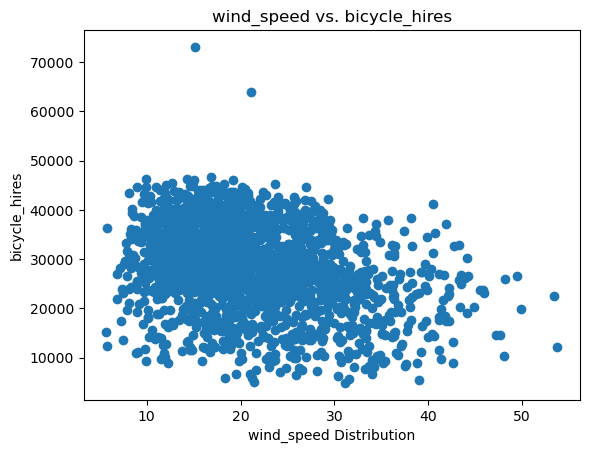

Pearson correlation coefficient:-0.3074289649050961
weather_z_interpretation
The day is unusual                  664
More temperature than usual         605
Less temperature than usual         518
The day is significantly unusual     40
Name: count, dtype: int64
------------------------------
z_score_interpretation
More hires than usual               822
The day is unusual                  467
Fewer hires than usual              441
The day is significantly unusual     96
Name: count, dtype: int64


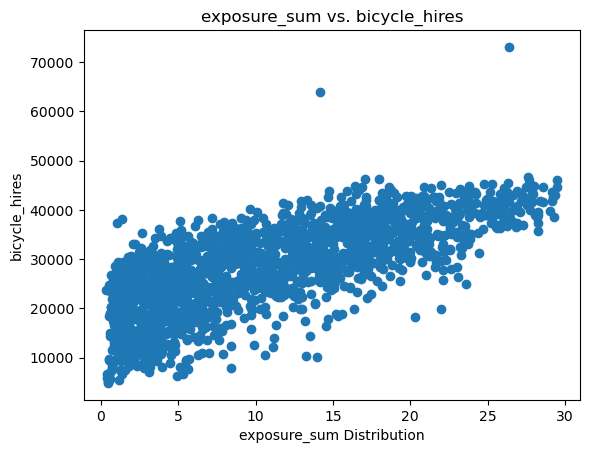

Pearson correlation coefficient:0.7182742087626279


In [134]:
main()